In [1]:
!pip install -r requirements.txt

In [2]:
import pandas

qqp_df = pandas.read_csv("train.csv", index_col="id", nrows=5000)
qqp_df.head()

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
qqp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   qid1          5000 non-null   int64 
 1   qid2          5000 non-null   int64 
 2   question1     5000 non-null   object
 3   question2     5000 non-null   object
 4   is_duplicate  5000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 234.4+ KB


In [4]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True, return_dict = False)

/Users/vishal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vishal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vishal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vishal/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [5]:
print(f"Original: {qqp_df['question1'][0]}")
print(f"Tokenized: {tokenizer.tokenize(qqp_df['question1'][0])}")
print(f"Token IDs: {tokenizer.convert_tokens_to_ids(tokenizer.tokenize(qqp_df['question1'][0]))}")

Original: What is the step by step guide to invest in share market in india?
Tokenized: ['what', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india', '?']
Token IDs: [2054, 2003, 1996, 3357, 2011, 3357, 5009, 2000, 15697, 1999, 3745, 3006, 1999, 2634, 1029]


In [6]:
encoded_pair = tokenizer.encode(qqp_df['question1'][0], qqp_df['question2'][0])
tokenizer.decode(encoded_pair)

'[CLS] what is the step by step guide to invest in share market in india? [SEP] what is the step by step guide to invest in share market? [SEP]'

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(qqp_df[["question1", "question2"]], 
                                                    qqp_df["is_duplicate"], test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.head()

,question1,question2
id,,
3444,Is there a way to get a user's friends' email ...,Is there any way to get a user's email address...
2063,How can I get rid of cellulite on my stomach?,I am in good shape but have a trouble spot of ...
3714,"Among SC, ST, NC and OBC which is the lowest c...",Is the 'Tili' caste in West Bengal SC/ST/OBC?
2671,Are you tolerant if you tolerate the intolerant?,Are you tolerant?
2154,Are food allergies more common in USA?,Why are food allergies so common in USA?


In [8]:
max_length = 310
tokenizer.encode_plus(X_train.iloc[0]["question1"], X_train.iloc[0]["question2"], max_length=max_length, 
                      pad_to_max_length=True, return_attention_mask=True, return_tensors='pt', truncation=True)

{'input_ids': tensor([[  101,  2003,  2045,  1037,  2126,  2000,  2131,  1037,  5310,  1005,
          1055,  2814,  1005, 10373,  4769,  2083,  9130, 17928,  2005, 25718,
          1029,   102,  2003,  2045,  2151,  2126,  2000,  2131,  1037,  5310,
          1005,  1055, 10373,  4769,  2083, 10474,  1051,  4887,  2705, 17928,
          1029,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [9]:
import torch

from tqdm import tqdm
from torch.utils.data import TensorDataset

def convert_to_dataset_torch(data: pandas.DataFrame, labels: pandas.Series) -> TensorDataset:
    input_ids = []
    attention_masks = []
    token_type_ids = []
    for _, row in tqdm(data.iterrows(), total=data.shape[0]):
        encoded_dict = tokenizer.encode_plus(row["question1"], row["question2"], max_length=max_length, pad_to_max_length=True, 
                      return_attention_mask=True, return_tensors='pt', truncation=True)
        # Add the encoded sentences to the list.
        input_ids.append(encoded_dict['input_ids'])
        token_type_ids.append(encoded_dict["token_type_ids"])
        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])
    
    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    token_type_ids = torch.cat(token_type_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels.values)
    
    return TensorDataset(input_ids, attention_masks, token_type_ids, labels)

In [10]:
train = convert_to_dataset_torch(X_train, y_train)
validation = convert_to_dataset_torch(X_validation, y_validation)

100%|███████████████████████████████████████| 800/800 [00:00<00:00, 2428.91it/s]


In [11]:
import multiprocessing

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

core_number = multiprocessing.cpu_count()

train_dataloader = DataLoader(
            train, 
            sampler = RandomSampler(train), 
            batch_size = batch_size,
            num_workers = core_number
        )
validation_dataloader = DataLoader(
            validation,
            sampler = SequentialSampler(validation), 
            batch_size = batch_size,
            num_workers = core_number
        )

In [13]:
from transformers import BertForSequenceClassification
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Using the 12-layer BERT model, with an uncased vocab.
    num_labels=2,  
    output_attentions=False,
    output_hidden_states=False,
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [14]:
from transformers import AdamW
adamw_optimizer = AdamW(bert_model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8 
                )

In [15]:
from transformers import get_linear_schedule_with_warmup

epochs = 2

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(adamw_optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [16]:
import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [17]:
def fit_batch(dataloader, model, optimizer, epoch):
    total_train_loss = 0
    
    for batch in tqdm(dataloader, desc=f"Training epoch:{epoch}", unit="batch"):
        input_ids, attention_masks, token_type_ids, labels = batch
        
        model.zero_grad()
        
        loss, _ = model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_masks, labels=labels)
        total_train_loss = total_train_loss + loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()
        
    return total_train_loss

In [18]:
import numpy

from sklearn.metrics import accuracy_score

def eval_batch(dataloader, model, metric=accuracy_score):
    total_eval_accuracy = 0
    total_eval_loss = 0
    predictions , predicted_labels = [], []
    
    for batch in tqdm(dataloader, desc="Evaluating", unit="batch"):
        input_ids, attention_masks, token_type_ids, labels = batch
        
        with torch.no_grad():
            loss, logits = model(input_ids, 
                                   token_type_ids=token_type_ids, 
                                   attention_mask=attention_masks,
                                   labels=labels)
        total_eval_loss = total_eval_loss + loss.item()

        y_pred = numpy.argmax(logits.detach().numpy(), axis=1).flatten()
        total_eval_accuracy = total_eval_accuracy + metric(labels, y_pred)
        
        predictions.extend(logits.detach().numpy().tolist())
        predicted_labels.extend(y_pred.tolist())
    
    return total_eval_accuracy, total_eval_loss, predictions ,predicted_labels

In [19]:
import random

seed_val = 42

random.seed(seed_val)
numpy.random.seed(seed_val)
torch.manual_seed(seed_val)


def train(train_dataloader, validation_dataloader, model, optimizer, epochs):
    #for storing accuracy, etc.
    training_stats = []
    
    # Measure the total training time for the whole run.
    total_t0 = time.time()
    
    for epoch in range(0, epochs):

        t0 = time.time()

        total_train_loss = 0

        model.train()
        
        total_train_loss = fit_batch(train_dataloader, model, optimizer, epoch)
        
        avg_train_loss = total_train_loss / len(train_dataloader)

        training_time = format_time(time.time() - t0)
        
        t0 = time.time()

        model.eval()
        
        total_eval_accuracy, total_eval_loss, _, _ = eval_batch(validation_dataloader, model)

        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        
        print(f"  Accuracy: {avg_val_accuracy}")

        avg_val_loss = total_eval_loss / len(validation_dataloader)

        validation_time = format_time(time.time() - t0)
    
        print(f"  Validation Loss: {avg_val_loss}")
    
        training_stats.append(
            {
                'epoch': epoch,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )
        

    print("")
    print("Training complete!")

    print(f"Total training took {format_time(time.time()-total_t0)}")
    return training_stats

In [20]:
training_stats = train(train_dataloader, validation_dataloader, bert_model, adamw_optimizer, epochs)

Training epoch:0:   0%|                              | 0/100 [00:00<?, ?batch/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Training epoch:0: 100%|██████████████████| 100/100 [1:28:07<00:00, 51.56s/batch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro

Evaluating:   0%|                                     | 0/25 [00:00<?, ?batch/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
	- Avoid using `tokenizers` before the fork if possible
To disable this warning, you can either:
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Evaluating: 100%|████████████████████████████| 25/25 [04:11<00:00,  9.98s/batch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro

Training epoch:1:   0%|                              | 0/100 [00:00<?, ?batch/s]

  Accuracy: 0.7325
  Validation Loss: 0.48477966904640196
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZE

Training epoch:1: 100%|██████████████████| 100/100 [1:18:45<00:00, 46.81s/batch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` 

Evaluating:   0%|                                     | 0/25 [00:00<?, ?batch/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Evaluating: 100%|████████████████████████████| 25/25 [04:09<00:00,  9.99s/batch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Avoid using `tokenizers` 

Evaluating: 100%|████████████████████████████| 25/25 [04:09<00:00,  9.99s/batch]

  Accuracy: 0.78125
  Validation Loss: 0.4441431283950806

Training complete!
Total training took 2:55:14


In [21]:
df_stats = pandas.DataFrame(training_stats).set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
0,0.555946,0.484780,0.73250,1:28:08,0:04:11
1,0.418284,0.444143,0.78125,1:18:45,0:04:10


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


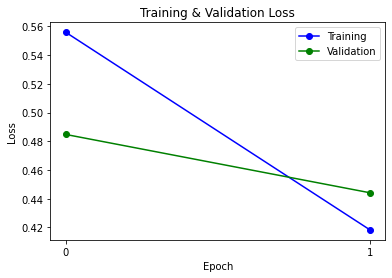

In [22]:
from matplotlib import pyplot

%matplotlib inline

pyplot.plot(df_stats['Training Loss'], 'b-o', label="Training")
pyplot.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
pyplot.title("Training & Validation Loss")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.xticks(df_stats.index.values.tolist())
pyplot.show()

In [23]:
test = convert_to_dataset_torch(X_test, y_test)
test_dataloader = DataLoader(test,  sampler=SequentialSampler(test), batch_size=batch_size)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2108.51it/s]


In [24]:
bert_model.eval()
_, _,_ ,predicted_labels = eval_batch(test_dataloader, bert_model)

Evaluating: 100%|████████████████████████████| 32/32 [05:30<00:00, 10.33s/batch]


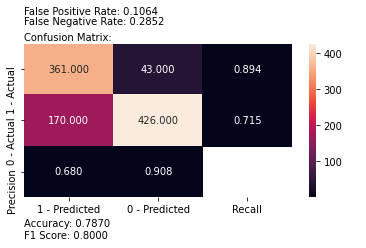

In [25]:
from ds_utils.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, predicted_labels, [1, 0])
pyplot.show()